# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     G:\Users\Saru\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv('token.env')

Python-dotenv could not parse statement starting at line 2
Python-dotenv could not parse statement starting at line 4


True

In [3]:
# Create a newsapi client
from newsapi.newsapi_client import NewsApiClient
newsapi = NewsApiClient(api_key=os.environ['NEWS_API_KEY'])

In [4]:
# Fetch the Bitcoin news articles
## \12-NLP\2\04-Stu_Crisis_Voice\Solved\voice_crisis.ipynb
btc_headlines = []
btc_headlines = newsapi.get_everything(
    q='bitcoin OR btc',
    language='en',
    sort_by='relevancy',
    page=1
)

btc_headlines

{'status': 'ok',
 'totalResults': 7315,
 'articles': [{'source': {'id': None, 'name': 'BeInCrypto'},
   'author': 'Nicholas Pongratz',
   'title': 'Bitcoin Mutual Fund Hits the Market as Crypto ETP Race Heats Up',
   'description': 'Maryland-based ProFunds is launching a publicly available mutual fund connected to the value of bitcoin (BTC).',
   'url': 'https://beincrypto.com/bitcoin-mutual-fund-hits-the-market-as-crypto-etp-race-heats-up/',
   'urlToImage': 'https://assets.entrepreneur.com/providers/be-in-crypto/hero-image-be-in-crypto-378754.jpeg',
   'publishedAt': '2021-07-29T11:45:36Z',
   'content': 'This story originally appeared on be[IN]cryptoMaryland-based ProFunds is launching a publicly available mutual fund connected to the value of bitcoin (BTC).\r\nThe Bitcoin Strategy ProFund invests in b… [+1875 chars]'},
  {'source': {'id': None, 'name': 'Entrepreneur'},
   'author': 'Entrepreneur en Español',
   'title': 'JP Morgan changed his mind and went from criticizing Bitcoin 

In [5]:
## Print total articles
print(f'Total articles about Bitcoin: {btc_headlines["totalResults"]}')

## Show sample article
btc_headlines['articles'][0]

Total articles about Bitcoin: 7315


{'source': {'id': None, 'name': 'BeInCrypto'},
 'author': 'Nicholas Pongratz',
 'title': 'Bitcoin Mutual Fund Hits the Market as Crypto ETP Race Heats Up',
 'description': 'Maryland-based ProFunds is launching a publicly available mutual fund connected to the value of bitcoin (BTC).',
 'url': 'https://beincrypto.com/bitcoin-mutual-fund-hits-the-market-as-crypto-etp-race-heats-up/',
 'urlToImage': 'https://assets.entrepreneur.com/providers/be-in-crypto/hero-image-be-in-crypto-378754.jpeg',
 'publishedAt': '2021-07-29T11:45:36Z',
 'content': 'This story originally appeared on be[IN]cryptoMaryland-based ProFunds is launching a publicly available mutual fund connected to the value of bitcoin (BTC).\r\nThe Bitcoin Strategy ProFund invests in b… [+1875 chars]'}

In [6]:
# Fetch the Ethereum news articles
eth_headlines = []
eth_headlines = newsapi.get_everything(
    q='ethereum OR eth',
    language='en',
)

eth_headlines

{'status': 'ok',
 'totalResults': 3453,
 'articles': [{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
   'author': 'Lucas Matney',
   'title': 'Tenderly raises $15.3M to help Ethereum developers ship decentralized apps faster',
   'description': 'Blockchain infrastructure startups are heating up as industry fervor brings more developers and users to a space that still feels extremely young despite a heavy institutional embrace of the crypto space in 2021. The latest crypto startup to court the attenti…',
   'url': 'http://techcrunch.com/2021/07/29/tenderly-raises-15-3m-to-help-ethereum-developers-ship-decentralized-apps-faster/',
   'urlToImage': 'https://techcrunch.com/wp-content/uploads/2021/07/Tenderly-Founding-Team-1.jpg?w=600',
   'publishedAt': '2021-07-29T18:27:16Z',
   'content': 'Blockchain infrastructure startups are heating up as industry fervor brings more developers and users to a space that still feels extremely young despite a heavy institutional embrace of the cr

In [7]:
## Print total articles
print(f'Total articles about Ethereum: {eth_headlines["totalResults"]}')

## Show sample article
eth_headlines['articles'][0]

Total articles about Ethereum: 3453


{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
 'author': 'Lucas Matney',
 'title': 'Tenderly raises $15.3M to help Ethereum developers ship decentralized apps faster',
 'description': 'Blockchain infrastructure startups are heating up as industry fervor brings more developers and users to a space that still feels extremely young despite a heavy institutional embrace of the crypto space in 2021. The latest crypto startup to court the attenti…',
 'url': 'http://techcrunch.com/2021/07/29/tenderly-raises-15-3m-to-help-ethereum-developers-ship-decentralized-apps-faster/',
 'urlToImage': 'https://techcrunch.com/wp-content/uploads/2021/07/Tenderly-Founding-Team-1.jpg?w=600',
 'publishedAt': '2021-07-29T18:27:16Z',
 'content': 'Blockchain infrastructure startups are heating up as industry fervor brings more developers and users to a space that still feels extremely young despite a heavy institutional embrace of the crypto s… [+2468 chars]'}

In [8]:
## \12-NLP\2\05-Ins_Vader_Sentiment\Solved\vader_sentiment.ipynb
# Create the Bitcoin sentiment scores DataFrame
## Initialize empty list
btc_sentiments = []

## for-loop parses sentiment scores from articles and appends them to btc_sentiments
for article in btc_headlines['articles']:
    ## try-except clause ends loop once an error is produced
    try:
        date = article['publishedAt'][:10]
        text = article['content']
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment['pos']
        neg = sentiment['neg']
        neu = sentiment['neu']
        
        btc_sentiments.append({
            'date': date,
            'text': text,
            'compound': compound,
            'positive': pos,
            'negative': neg,
            'neutral': neu
        })

    except AttributeError:
        pass

## Create DataFrame
btc_df = pd.DataFrame(btc_sentiments)

## Create list of column names and add to DataFrame
cols = ['date','text','compound','positive','negative','neutral']
btc_df = btc_df[cols]

btc_df.head()

,date,text,compound,positive,negative,neutral
0,2021-07-29,This story originally appeared on be[IN]crypto...,0.3400,0.079,0.000,0.921
1,2021-08-06,"August\r\n6, 2021\r\n3 min read\r\nThis articl...",-0.3400,0.000,0.066,0.934
2,2021-08-06,When my wife started a little garden in our ur...,-0.3400,0.000,0.061,0.939
3,2021-08-23,PayPal will now allow users outside the U.S. t...,0.4215,0.098,0.000,0.902
4,2021-08-10,Photo by Joe Raedle/Getty Images\r\n\n \n\n Tw...,0.4019,0.080,0.000,0.920


In [9]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = []

for article in eth_headlines['articles']:
    try:
        date = article['content']
        text = article['content']
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment['pos']
        neg = sentiment['neg']
        neu = sentiment['neu']

        eth_sentiments.append({
            'date': date,
            'text': text,
            'compound': compound,
            'positive': pos,
            'negative': neg,
            'neutral': neu
        })
    except AttributeError:
        pass
    
eth_df = pd.DataFrame(eth_sentiments)

cols = ['date','text','compound','positive','negative','neutral']
eth_df = eth_df[cols]

eth_df.head()

,date,text,compound,positive,negative,neutral
0,Blockchain infrastructure startups are heating...,Blockchain infrastructure startups are heating...,-0.2411,0.000,0.061,0.939
1,Cent was founded in 2017 as an ad-free creator...,Cent was founded in 2017 as an ad-free creator...,0.6956,0.190,0.000,0.810
2,PayPal will now allow users outside the U.S. t...,PayPal will now allow users outside the U.S. t...,0.4215,0.098,0.000,0.902
3,"August\r\n10, 2021\r\n4 min read\r\nThis story...","August\r\n10, 2021\r\n4 min read\r\nThis story...",0.5106,0.150,0.060,0.790
4,Vitalik Buterin.\r\nJohn Phillips/ Getty image...,Vitalik Buterin.\r\nJohn Phillips/ Getty image...,0.0000,0.000,0.000,1.000


In [10]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.00000,20.00000,20.000000
mean,0.199210,0.07500,0.03100,0.894000
std,0.440560,0.05753,0.06438,0.057118
min,-0.886000,0.00000,0.00000,0.729000
25%,-0.085000,0.00000,0.00000,0.857500
50%,0.340000,0.08450,0.00000,0.905500
75%,0.525925,0.10525,0.06225,0.931000
max,0.690800,0.16100,0.27100,1.000000


In [11]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.00000,20.000000
mean,0.182865,0.059100,0.01530,0.925550
std,0.325987,0.068093,0.02868,0.070746
min,-0.361200,0.000000,0.00000,0.790000
25%,0.000000,0.000000,0.00000,0.860250
50%,0.000000,0.025000,0.00000,0.934000
75%,0.443775,0.113500,0.01075,1.000000
max,0.695600,0.190000,0.09400,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: btc

Q: Which coin had the highest compound score?

A: eth

Q. Which coin had the highest positive score?

A: eth

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [12]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [13]:
# Instantiate the lemmatizer
wnl = WordNetLemmatizer()
print(wnl)

# Create a list of stopwords
## \12-NLP\1\03-Ins_Stopwords\Solved\stopwords.ipynb
## \12-NLP\1\04-Stu_Crude_Stopwords\Solved\crude_stopwords.ipynb
sw = set(stopwords.words('english'))   ## NLTK list of stopwords

print(sw)

<WordNetLemmatizer>
{"doesn't", 'no', 'didn', 'her', "that'll", 'once', 'myself', "needn't", 'those', 'y', 'll', 'hadn', 'their', 'she', 'doing', 'each', 'was', "won't", 'mightn', 'any', 'whom', 'the', 'nor', 'him', "mustn't", 'what', 'yourself', 'herself', 'then', 'yours', 'further', 'from', 'm', 'wasn', 'were', 'and', 'can', 'are', "weren't", 'o', 'while', 'am', 'having', 've', 'he', 'until', 'only', 'needn', 'when', 'by', 'up', 'at', 'isn', 'yourselves', 'himself', 'between', "you've", 'itself', 'below', 'not', 'hasn', 'ma', "haven't", 'if', 'should', 's', 'an', 'couldn', 'will', "shan't", 'just', "mightn't", 'or', 'how', 'over', 'own', 'there', 'here', 'i', "wouldn't", 't', "it's", 'about', 'themselves', 'is', 'same', 'd', 'after', 'most', "wasn't", 'its', "you'll", "hadn't", 'under', 'other', 'wouldn', 'them', 'so', 'that', 'off', 'few', 'for', 'mustn', 'these', 'do', 'did', 'again', "isn't", 'all', 'we', 'his', "she's", 'than', 'ain', "didn't", "hasn't", 'haven', 'ourselves', "ar

In [14]:
# Expand the default stopwords list if necessary
sw_addons = {'usually','ha','ano','char','wa','bitcoin','btc','ethereum','eth','chars'}

## Combine the two sets of stopwords with union() method
sw_expanded = sw.union(sw_addons)

print(sw_expanded)

{"doesn't", 'no', 'didn', 'her', "that'll", 'once', 'myself', "needn't", 'those', 'y', 'll', 'hadn', 'their', 'she', 'doing', 'each', 'was', "won't", 'mightn', 'any', 'whom', 'the', 'nor', 'him', "mustn't", 'what', 'yourself', 'herself', 'then', 'yours', 'further', 'from', 'm', 'wasn', 'ha', 'usually', 'were', 'and', 'can', 'are', "weren't", 'o', 'while', 'am', 'having', 've', 'he', 'until', 'only', 'needn', 'when', 'by', 'char', 'up', 'at', 'isn', 'yourselves', 'himself', 'between', "you've", 'itself', 'below', 'not', 'hasn', 'ethereum', 'ma', "haven't", 'if', 'should', 'bitcoin', 's', 'an', 'chars', 'couldn', 'ano', 'will', "shan't", 'btc', 'just', "mightn't", 'or', 'how', 'over', 'own', 'there', 'here', 'i', "wouldn't", 't', "it's", 'about', 'themselves', 'is', 'same', 'd', 'after', 'most', "wasn't", 'wa', 'its', "you'll", "hadn't", 'under', 'other', 'wouldn', 'them', 'so', 'that', 'off', 'few', 'for', 'mustn', 'these', 'do', 'did', 'again', "isn't", 'all', 'we', 'his', "she's", 'th

In [15]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile('[^a-zA-Z ]')
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    ## \12-NLP\1\06-Stu_Lemmatize\Solved\lemmatize.ipynb
    ## \12-NLP\1\05-Ins_Lemmatization\Solved\lemmatization.ipynb
    lem = [wnl.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    # Remove the stop words
    tokens = [word.lower() for word in lem if word.lower() not in sw_expanded]
    
    return tokens

## print() plugs in the last article retrieved when fetching all of the articles
print(tokenizer(text))

['swiss', 'alternative', 'protein', 'company', 'planted', 'raised', 'second', 'chf', 'present', 'round', 'year', 'preb', 'fundraise', 'help', 'continue', 'growth', 'debut', 'new', 'product']


In [16]:
# Create a new tokens column for Bitcoin
## https://stackoverflow.com/questions/33098040/how-to-use-word-tokenize-in-data-frame
print(btc_df['text'][2], '\n')
btc_df['tokens'] = btc_df.apply(lambda row: tokenizer(row['text']), axis=1)

print(btc_df['tokens'][2])
btc_df.head(5)

When my wife started a little garden in our urban backyard, all I could think about were the worms. Also the bugs, and the dirt, which is of course filled with worms and bugs and composted corn cobs.… [+3499 chars] 

['wife', 'started', 'little', 'garden', 'urban', 'backyard', 'could', 'think', 'worm', 'also', 'bug', 'dirt', 'course', 'filled', 'worm', 'bug', 'composted', 'corn', 'cob']


,date,text,compound,positive,negative,neutral,tokens
0,2021-07-29,This story originally appeared on be[IN]crypto...,0.3400,0.079,0.000,0.921,"[story, originally, appeared, beincryptomaryla..."
1,2021-08-06,"August\r\n6, 2021\r\n3 min read\r\nThis articl...",-0.3400,0.000,0.066,0.934,"[august, min, readthis, article, translated, s..."
2,2021-08-06,When my wife started a little garden in our ur...,-0.3400,0.000,0.061,0.939,"[wife, started, little, garden, urban, backyar..."
3,2021-08-23,PayPal will now allow users outside the U.S. t...,0.4215,0.098,0.000,0.902,"[paypal, allow, user, outside, us, buy, hold, ..."
4,2021-08-10,Photo by Joe Raedle/Getty Images\r\n\n \n\n Tw...,0.4019,0.080,0.000,0.920,"[photo, joe, raedlegetty, images, twitter, squ..."


In [17]:
# Create a new tokens column for Ethereum
print(eth_df['text'][0], '\n')
eth_df['tokens'] = eth_df.apply(lambda row: tokenizer(row['text']), axis=1)

print(eth_df['tokens'][0])
eth_df.head(5)

Blockchain infrastructure startups are heating up as industry fervor brings more developers and users to a space that still feels extremely young despite a heavy institutional embrace of the crypto s… [+2468 chars] 

['blockchain', 'infrastructure', 'startup', 'heating', 'industry', 'fervor', 'brings', 'developer', 'user', 'space', 'still', 'feel', 'extremely', 'young', 'despite', 'heavy', 'institutional', 'embrace', 'crypto']


,date,text,compound,positive,negative,neutral,tokens
0,Blockchain infrastructure startups are heating...,Blockchain infrastructure startups are heating...,-0.2411,0.000,0.061,0.939,"[blockchain, infrastructure, startup, heating,..."
1,Cent was founded in 2017 as an ad-free creator...,Cent was founded in 2017 as an ad-free creator...,0.6956,0.190,0.000,0.810,"[cent, founded, adfree, creator, network, allo..."
2,PayPal will now allow users outside the U.S. t...,PayPal will now allow users outside the U.S. t...,0.4215,0.098,0.000,0.902,"[paypal, allow, user, outside, us, buy, hold, ..."
3,"August\r\n10, 2021\r\n4 min read\r\nThis story...","August\r\n10, 2021\r\n4 min read\r\nThis story...",0.5106,0.150,0.060,0.790,"[august, min, readthis, story, originally, app..."
4,Vitalik Buterin.\r\nJohn Phillips/ Getty image...,Vitalik Buterin.\r\nJohn Phillips/ Getty image...,0.0000,0.000,0.000,1.000,"[vitalik, buterinjohn, phillips, getty, images..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [18]:
# \12-NLP\1\07-Ins_Ngram_Count\Solved\ngram_count.ipynb
# \12-NLP\1\08-Stu_Counter\Solved\counter.ipynb
from collections import Counter
from nltk import ngrams

In [19]:
btc_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-07-29,This story originally appeared on be[IN]crypto...,0.3400,0.079,0.000,0.921,"[story, originally, appeared, beincryptomaryla..."
1,2021-08-06,"August\r\n6, 2021\r\n3 min read\r\nThis articl...",-0.3400,0.000,0.066,0.934,"[august, min, readthis, article, translated, s..."
2,2021-08-06,When my wife started a little garden in our ur...,-0.3400,0.000,0.061,0.939,"[wife, started, little, garden, urban, backyar..."
3,2021-08-23,PayPal will now allow users outside the U.S. t...,0.4215,0.098,0.000,0.902,"[paypal, allow, user, outside, us, buy, hold, ..."
4,2021-08-10,Photo by Joe Raedle/Getty Images\r\n\n \n\n Tw...,0.4019,0.080,0.000,0.920,"[photo, joe, raedlegetty, images, twitter, squ..."


In [20]:
# Generate the Bitcoin N-grams where N=2
btc_article = btc_df['text'][2]
print(btc_article, '\n')

btc_tokenized = tokenizer(btc_article)
print(btc_tokenized, '\n')

btc_bigram_counts = Counter(ngrams(btc_tokenized, n=2))
print(dict(btc_bigram_counts))

When my wife started a little garden in our urban backyard, all I could think about were the worms. Also the bugs, and the dirt, which is of course filled with worms and bugs and composted corn cobs.… [+3499 chars] 

['wife', 'started', 'little', 'garden', 'urban', 'backyard', 'could', 'think', 'worm', 'also', 'bug', 'dirt', 'course', 'filled', 'worm', 'bug', 'composted', 'corn', 'cob'] 

{('wife', 'started'): 1, ('started', 'little'): 1, ('little', 'garden'): 1, ('garden', 'urban'): 1, ('urban', 'backyard'): 1, ('backyard', 'could'): 1, ('could', 'think'): 1, ('think', 'worm'): 1, ('worm', 'also'): 1, ('also', 'bug'): 1, ('bug', 'dirt'): 1, ('dirt', 'course'): 1, ('course', 'filled'): 1, ('filled', 'worm'): 1, ('worm', 'bug'): 1, ('bug', 'composted'): 1, ('composted', 'corn'): 1, ('corn', 'cob'): 1}


In [21]:
eth_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,Blockchain infrastructure startups are heating...,Blockchain infrastructure startups are heating...,-0.2411,0.000,0.061,0.939,"[blockchain, infrastructure, startup, heating,..."
1,Cent was founded in 2017 as an ad-free creator...,Cent was founded in 2017 as an ad-free creator...,0.6956,0.190,0.000,0.810,"[cent, founded, adfree, creator, network, allo..."
2,PayPal will now allow users outside the U.S. t...,PayPal will now allow users outside the U.S. t...,0.4215,0.098,0.000,0.902,"[paypal, allow, user, outside, us, buy, hold, ..."
3,"August\r\n10, 2021\r\n4 min read\r\nThis story...","August\r\n10, 2021\r\n4 min read\r\nThis story...",0.5106,0.150,0.060,0.790,"[august, min, readthis, story, originally, app..."
4,Vitalik Buterin.\r\nJohn Phillips/ Getty image...,Vitalik Buterin.\r\nJohn Phillips/ Getty image...,0.0000,0.000,0.000,1.000,"[vitalik, buterinjohn, phillips, getty, images..."


In [22]:
# Generate the Ethereum N-grams where N=2
eth_article = eth_df['text'].iloc[2]
print(eth_article, '\n')

eth_tokenized = tokenizer(eth_article)
print(eth_tokenized, '\n')

eth_bigram_counts = Counter(ngrams(eth_tokenized, n=2))
print(dict(eth_bigram_counts))

PayPal will now allow users outside the U.S. to buy, hold and sell cryptocurrency for the first time. The company announced today the launch of a new service that will allow customers in the U.K. to … [+4420 chars] 

['paypal', 'allow', 'user', 'outside', 'us', 'buy', 'hold', 'sell', 'cryptocurrency', 'first', 'time', 'company', 'announced', 'today', 'launch', 'new', 'service', 'allow', 'customer', 'uk'] 

{('paypal', 'allow'): 1, ('allow', 'user'): 1, ('user', 'outside'): 1, ('outside', 'us'): 1, ('us', 'buy'): 1, ('buy', 'hold'): 1, ('hold', 'sell'): 1, ('sell', 'cryptocurrency'): 1, ('cryptocurrency', 'first'): 1, ('first', 'time'): 1, ('time', 'company'): 1, ('company', 'announced'): 1, ('announced', 'today'): 1, ('today', 'launch'): 1, ('launch', 'new'): 1, ('new', 'service'): 1, ('service', 'allow'): 1, ('allow', 'customer'): 1, ('customer', 'uk'): 1}


In [23]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [24]:
## Retrieving 'content' ('text') data from newsapi articles produced only a few lines
## Combined all articles into one big string to give WordCloud a larger dataset to work with
btc_big_string = ' '.join(btc_df['text'])
print(btc_big_string)

This story originally appeared on be[IN]cryptoMaryland-based ProFunds is launching a publicly available mutual fund connected to the value of bitcoin (BTC).
The Bitcoin Strategy ProFund invests in b… [+1875 chars] August
6, 2021
3 min read
This article was translated from our Spanish edition using AI technologies. Errors may exist due to this process.
Criptomonedas the boom in the last year and a half has … [+2473 chars] When my wife started a little garden in our urban backyard, all I could think about were the worms. Also the bugs, and the dirt, which is of course filled with worms and bugs and composted corn cobs.… [+3499 chars] PayPal will now allow users outside the U.S. to buy, hold and sell cryptocurrency for the first time. The company announced today the launch of a new service that will allow customers in the U.K. to … [+4420 chars] Photo by Joe Raedle/Getty Images

 

 Twitter and Square CEO Jack Dorsey, a noted superfan of Bitcoin, claimed on Monday that the cryptocurrency 

In [25]:
## Tokenized the combined string
btc_big_string_tokenized = tokenizer(btc_big_string)
print(len(btc_big_string_tokenized))
print(btc_big_string_tokenized[:10])

366
['story', 'originally', 'appeared', 'beincryptomarylandbased', 'profunds', 'launching', 'publicly', 'available', 'mutual', 'fund']


In [26]:
# Use token_count to get the top 10 words for Bitcoin
## Top 10 words from selected Bitcoin article
btc_tokenized_count = pd.DataFrame(token_count(btc_tokenized, 10), columns=['word','count'])

btc_tokenized_count

,word,count
0,worm,2
1,bug,2
2,wife,1
3,started,1
4,little,1
5,garden,1
6,urban,1
7,backyard,1
8,could,1
9,think,1


In [27]:
## Top 10 words from all Bitcoin articles
btc_big_string_count = pd.DataFrame(token_count(btc_big_string_tokenized, 10), columns=['word','count'])

btc_big_string_count

,word,count
0,story,4
1,august,4
2,min,4
3,allow,4
4,hold,4
5,cryptocurrency,4
6,customer,4
7,originally,3
8,appeared,3
9,readthis,3


In [28]:
# Use token_count to get the top 10 words for Ethereum
eth_tokenized_count = pd.DataFrame(token_count(eth_tokenized, 10), columns=['word','count'])
eth_tokenized_count

,word,count
0,allow,2
1,paypal,1
2,user,1
3,outside,1
4,us,1
5,buy,1
6,hold,1
7,sell,1
8,cryptocurrency,1
9,first,1


In [29]:
eth_big_string = ' '.join(eth_df['text'])
eth_big_string_tokenized = tokenizer(eth_big_string)
print(len(eth_big_string_tokenized))
print(eth_big_string_tokenized[:10])

eth_big_string_count = pd.DataFrame(token_count(eth_big_string_tokenized, 10), columns=['word','count'])
eth_big_string_count

362
['blockchain', 'infrastructure', 'startup', 'heating', 'industry', 'fervor', 'brings', 'developer', 'user', 'space']


,word,count
0,blockchain,5
1,cryptocurrency,4
2,vitalik,4
3,motherboard,4
4,reuters,4
5,user,3
6,company,3
7,new,3
8,buterin,3
9,cryptocurrencies,3


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [30]:
## \12-NLP\1\09-Ins_Word_Cloud\Solved\wordcloud.ipynb
## \12-NLP\1\10-Stu_Gas_Cloud\Solved\gas_cloud.ipynb
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [31]:
print(btc_big_string_tokenized[:20])
print(type(btc_big_string_tokenized), '\n')

## The tokenized big string returns as a list, so needed to convert to type(str) for WordCloud.
## Will continue to explore alternative data processing methods when fetching from NewsAPI.
## Most exercises utilize reuters, so I didn't have many rerferences to go by from the
## activities we've done. As such, used a sample from GeeksforGeeks
## https://www.geeksforgeeks.org/python-program-to-convert-a-list-to-string/

print(' '.join([str(elem) for elem in btc_big_string_tokenized])[:100])

['story', 'originally', 'appeared', 'beincryptomarylandbased', 'profunds', 'launching', 'publicly', 'available', 'mutual', 'fund', 'connected', 'value', 'btcthe', 'strategy', 'profund', 'invests', 'b', 'august', 'min', 'readthis']
<class 'list'> 

story originally appeared beincryptomarylandbased profunds launching publicly available mutual fund 


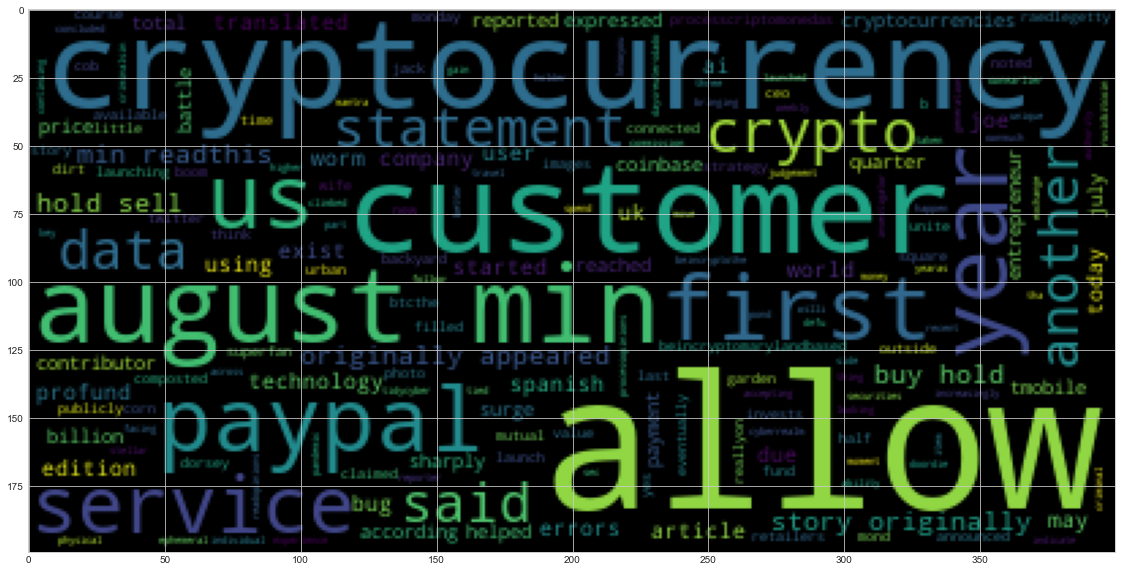

In [32]:
# Generate the Bitcoin word cloud
def wc_btc():
    btc_wc_string = ' '.join([str(elem) for elem in btc_big_string_tokenized])
    btc_wc = WordCloud().generate(btc_wc_string)
    plt.imshow(btc_wc)
    
wc_btc()

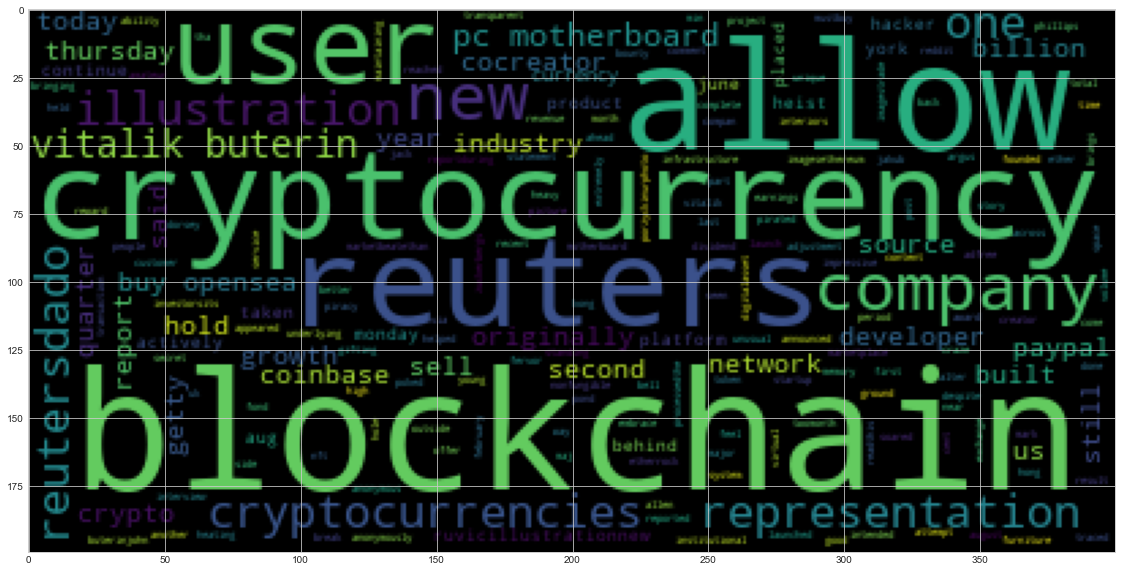

In [33]:
# Generate the Ethereum word cloud
def wc_eth():
    eth_wc_string = ' '.join([str(elem) for elem in eth_big_string_tokenized])
    eth_wc = WordCloud().generate(eth_wc_string)
    plt.imshow(eth_wc)
    
wc_eth()


---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [34]:
import spacy
from spacy import displacy

In [35]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [36]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [37]:
# Concatenate all of the Bitcoin text together
btc_big_string

'This story originally appeared on be[IN]cryptoMaryland-based ProFunds is launching a publicly available mutual fund connected to the value of bitcoin (BTC).\r\nThe Bitcoin Strategy ProFund invests in b… [+1875 chars] August\r\n6, 2021\r\n3 min read\r\nThis article was translated from our Spanish edition using AI technologies. Errors may exist due to this process.\r\nCriptomonedas the boom in the last year and a half has … [+2473 chars] When my wife started a little garden in our urban backyard, all I could think about were the worms. Also the bugs, and the dirt, which is of course filled with worms and bugs and composted corn cobs.… [+3499 chars] PayPal will now allow users outside the U.S. to buy, hold and sell cryptocurrency for the first time. The company announced today the launch of a new service that will allow customers in the U.K. to … [+4420 chars] Photo by Joe Raedle/Getty Images\r\n\n \n\n Twitter and Square CEO Jack Dorsey, a noted superfan of Bitcoin, claimed on Monday th

In [38]:
# Run the NER processor on all of the text
btc_doc = nlp(btc_big_string)

# Add a title to the document
btc_doc.user_data['title'] = 'Bitcoin NER'


In [39]:
## Access the tagged entities with .text and .label_
for ent in btc_doc.ents:        ## For each entity in the list of entity types found in btc_doc
    print(ent.text, ent.label_) ## print the entity's text and its label

be[IN]cryptoMaryland ORG
ProFunds ORG
August DATE
6, 2021 DATE
Spanish NORP
AI ORG
the last year and a half DATE
U.S. GPE
first ORDINAL
today DATE
U.K. GPE
Joe Raedle PERSON
Twitter PRODUCT
Square PRODUCT
Jack Dorsey PERSON
Monday DATE
a year DATE
US GPE
August
21, 2021 DATE
U.S. Securities and Exchange Commission ORG
SEC ORG
three CARDINAL
Joe TidyCyber PERSON
recent days DATE
Dado Ruvic
Bitcoin ORG
weekly DATE
Spanish NORP
AI ORG
Entrepreneur ORG
August
18, 2021 DATE
Entrepreneur ORG
Earlier this year DATE
August DATE
20, 2021 DATE
PennyStocksBitcoin Price Surge Helped Boost ORG
Bitcoin, Dogecoin ORG
Ethereum GPE
every day DATE
3 p.m. PDT TIME
Daily Crunch ORG
July 23, 2021 DATE
today DATE
Coinbase PERSON
its second quarter DATE
the quarter DATE
Coinbase ORG
$2.23 billion MONEY
two years DATE
roughly 49 million CARDINAL
UK GPE
first ORDINAL
four CARDINAL
SINGAPORE GPE
July 28 DATE
Reuters ORG
40,000 MONEY
Wednesday DATE
Motherboard PERSON
first ORDINAL
$311 billion MONEY
Q2 2021 DATE

In [40]:
# Render the visualization
displacy.render(btc_doc, style='ent')

In [41]:
# List all Entities
print([ent.text for ent in btc_doc.ents], '\n')

## List 'ORG' entities
print([ent.text for ent in btc_doc.ents if ent.label_ == 'ORG'])

['be[IN]cryptoMaryland', 'ProFunds', 'August', '6, 2021', 'Spanish', 'AI', 'the last year and a half', 'U.S.', 'first', 'today', 'U.K.', 'Joe Raedle', 'Twitter', 'Square', 'Jack Dorsey', 'Monday', 'a year', 'US', 'August\r\n21, 2021', 'U.S. Securities and Exchange Commission', 'SEC', 'three', 'Joe TidyCyber', 'recent days', 'Dado Ruvic\r\nBitcoin', 'weekly', 'Spanish', 'AI', 'Entrepreneur', 'August\r\n18, 2021', 'Entrepreneur', 'Earlier this year', 'August', '20, 2021', 'PennyStocksBitcoin Price Surge Helped Boost', 'Bitcoin, Dogecoin', 'Ethereum', 'every day', '3 p.m. PDT', 'Daily Crunch', 'July 23, 2021', 'today', 'Coinbase', 'its second quarter', 'the quarter', 'Coinbase', '$2.23 billion', 'two years', 'roughly 49 million', 'UK', 'first', 'four', 'SINGAPORE', 'July 28', 'Reuters', '40,000', 'Wednesday', 'Motherboard', 'first', '$311 billion', 'Q2 2021', 'Insider Intellige'] 

['be[IN]cryptoMaryland', 'ProFunds', 'AI', 'U.S. Securities and Exchange Commission', 'SEC', 'Dado Ruvic\r\n

---

### Ethereum NER

In [42]:
# Concatenate all of the Ethereum text together
eth_big_string

'Blockchain infrastructure startups are heating up as industry fervor brings more developers and users to a space that still feels extremely young despite a heavy institutional embrace of the crypto s… [+2468 chars] Cent was founded in 2017 as an ad-free creator network that allows users to offer each other crypto rewards for good posts and comments — it’s like gifting awards on Reddit, but with Ethereum. But in… [+6228 chars] PayPal will now allow users outside the U.S. to buy, hold and sell cryptocurrency for the first time. The company announced today the launch of a new service that will allow customers in the U.K. to … [+4420 chars] August\r\n10, 2021\r\n4 min read\r\nThis story originally appeared on MarketBeatEthan Allen Interiors Is A Must-Buy For Dividend Growth Investors\r\nIt\'s no secret that we are fond of the furniture industry … [+4048 chars] Vitalik Buterin.\r\nJohn Phillips/ Getty images\r\nEthereum co-creator Vitalik Buterin poked holes on Thursday in Jack Dorsey and 

In [43]:
# Run the NER processor on all of the text
eth_doc = nlp(eth_big_string)

# Add a title to the document
eth_doc.user_data['title'] = 'Ethereum NER'

In [44]:
## Access the tagged entities with .text and .label_
for ent in eth_doc.ents:
    print(ent.text, ent.label_)

2017 DATE
Reddit NORP
Ethereum PERSON
U.S. GPE
first ORDINAL
today DATE
U.K. GPE
August
10, 2021 DATE
Allen Interiors PERSON
Vitalik Buterin PERSON
John Phillips/ PERSON
Vitalik Buterin PERSON
Thursday DATE
Jack Dorsey PERSON
Mark Zuckerberg's PERSON
Ethereum PERSON
Jakub Porzycki/ PERSON
NurPhoto ORG
Getty Images
Trade ORG
NFT ORG
OpenSea ORG
the last month DATE
$1.22 billion MONEY
3 CARDINAL
today DATE
Coinbase PERSON
its second quarter DATE
the quarter DATE
Coinbase ORG
$2.23 billion MONEY
a year DATE
US GPE
Ethereum PERSON
February 3, 2018 DATE
REUTERS ORG
Dado Ruvic PERSON
Aug 5 DATE
Reuters ORG
EtherRock ORG
Motherboard PERSON
HONG KONG GPE
Aug 5 DATE
Reuters ORG
two-month DATE
Thursday DATE
One CARDINAL
Monday DATE
Poly Network ORG
White PERSON
Ethereum PERSON
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic/IllustrationAug 3 PERSON
Reuters ORG
Ethereum PERSON
Monday DATE
Amazon ORG
Amazon ORG
Vitalik Buterin PERSON
TechCrunch Disrupt London 2015 ORG
John Phillips PERSON
Vitalik Buteri

In [45]:
# Render the visualization
displacy.render(eth_doc, style='ent')

In [48]:
# List all Entities
print([ent.text for ent in eth_doc.ents], '\n')

## List 'ORG' entities
print([ent.text for ent in btc_doc.ents if ent.label_ == 'ORG'])

['2017', 'Reddit', 'Ethereum', 'U.S.', 'first', 'today', 'U.K.', 'August\r\n10, 2021', 'Allen Interiors', 'Vitalik Buterin', 'John Phillips/', 'Vitalik Buterin', 'Thursday', 'Jack Dorsey', "Mark Zuckerberg's", 'Ethereum', 'Jakub Porzycki/', 'NurPhoto', 'Getty Images\r\nTrade', 'NFT', 'OpenSea', 'the last month', '$1.22 billion', '3', 'today', 'Coinbase', 'its second quarter', 'the quarter', 'Coinbase', '$2.23 billion', 'a year', 'US', 'Ethereum', 'February 3, 2018', 'REUTERS', 'Dado Ruvic', 'Aug 5', 'Reuters', 'EtherRock', 'Motherboard', 'HONG KONG', 'Aug 5', 'Reuters', 'two-month', 'Thursday', 'One', 'Monday', 'Poly Network', 'White', 'Ethereum', 'June 29, 2021', 'REUTERS', 'Dado Ruvic/IllustrationAug 3', 'Reuters', 'Ethereum', 'Monday', 'Amazon', 'Amazon', 'Vitalik Buterin', 'TechCrunch Disrupt London 2015', 'John Phillips', 'Vitalik Buterin', 'BBC News', 'almost half', '$600m', '433', 'Yesterday', 'Justin Sullivan', 'Getty Images\r\nCitigroup', 'CoinDesk', 'two', 'one', 'Ethereum', 

---